In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

In [ ]:
#bai tap 2
def fast_fourier_transform(img_array):
    """Apply Fast Fourier Transform to image"""
    fft_result = np.abs(scipy.fftpack.fft2(img_array))
    fft_shifted = scipy.fftpack.fftshift(fft_result)
    # Normalize for display
    fft_display = np.log(1 + fft_shifted)
    fft_display = (fft_display / np.max(fft_display) * 255).astype(np.uint8)
    return fft_display

def butterworth_lowpass_filter(img_array, d0=30, n=1):
    c = abs(scipy.fftpack.fft2(img_array))
    # shifting the Fourier frequency image
    d = scipy.fftpack.fftshift(c)
    
    # initializing variables for convolution function
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and values in H are initialized to 1
    H = np.ones((M, N))

    center1 = M/2
    center2 = N/2
    d_0 = d0  # cut-off radius
    n1 = n    # the order of BLPF (Butterworth Lowpass Filter)
    
    # Complete the filter implementation
    for i in range(M):
        for j in range(N):
            u1 = (i - center1)**2 + (j - center2)**2
            # euclidean distance from origin is computed
            r = math.sqrt(u1)
            # using cut-off radius to eliminate high frequency
            if r > d_0:
                H[i, j] = 1/(1 + (r/d_0)**(2*n1))
    
    # H is converted to float
    H = H.astype(float)
    
    # performing the convolution
    con = d * H
    
    # computing the magnitude of the inverse FFT
    e = abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(con)))
    
    # Convert to uint8 for display
    result = e.astype(np.uint8)
    
    return result

def butterworth_highpass_filter(img_array, d0=30, n=1):
    """Apply Butterworth Highpass Filter to image"""
    M, N = img_array.shape
    center1, center2 = M / 2, N / 2
    H = np.zeros((M, N), dtype=float)

    for i in range(M):
        for j in range(N):
            u = (i - center1) ** 2 + (j - center2) ** 2
            r = np.sqrt(u)
            if r > 0:
                H[i, j] = 1 / (1 + (d0 / r) ** (2 * n))
            else:
                H[i, j] = 0

    fft_result = scipy.fftpack.fft2(img_array)
    convolved = fft_result * H
    ifft_result = np.abs(scipy.fftpack.ifft2(convolved))
    return ifft_result.astype(np.uint8)

def fourier_menu():
    """Main menu for Fourier transform operations"""
    # Load image once
    img = Image.open("bird.png").convert("L")
    img_array = np.asarray(img)
    
    while True:
        print("\n=== MENU BIEN DOI FOURIER ===")
        print("1. Fast Fourier Transform")
        print("2. Butterworth Lowpass Filter")
        print("3. Butterworth Highpass Filter")
        print("Q. Quit")

        choice = input("Chon phuong phap (1/2/3/Q): ").upper()

        if choice == '1':
            result = fast_fourier_transform(img_array)
            show_results(img, Image.fromarray(result), "Fast Fourier Transform")
            
        elif choice == '2':
            d0 = float(input("Nhap cut-off radius (default=30): ") or "30")
            n = int(input("Nhap order of filter (default=1): ") or "1")
            result = butterworth_lowpass_filter(img_array, d0, n)
            show_results(img, Image.fromarray(result), f"Butterworth Lowpass Filter (d0={d0}, n={n})")
            
        elif choice == '3':
            d0 = float(input("Nhap cut-off radius (default=30): ") or "30")
            n = int(input("Nhap order of filter (default=1): ") or "1")
            result = butterworth_highpass_filter(img_array, d0, n)
            show_results(img, Image.fromarray(result), f"Butterworth Highpass Filter (d0={d0}, n={n})")
            
        elif choice == 'Q':
            print("Ket thuc chuong trinh!")
            break
        else:
            print("Lua chon khong hop le!")

def show_results(original, transformed, title):
    """Display original and transformed images side by side"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(transformed, cmap='gray') 
    ax2.set_title(title)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Run the program
fourier_menu()


=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
Q. Quit
Lua chon khong hop le!

=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
Q. Quit
Lua chon khong hop le!

=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
Q. Quit
Lua chon khong hop le!

=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
Q. Quit
Lua chon khong hop le!

=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
Q. Quit
Lua chon khong hop le!

=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth Highpass Filter
Q. Quit
Lua chon khong hop le!

=== MENU BIEN DOI FOURIER ===
1. Fast Fourier Transform
2. Butterworth Lowpass Filter
3. Butterworth High


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Contrast Stretching


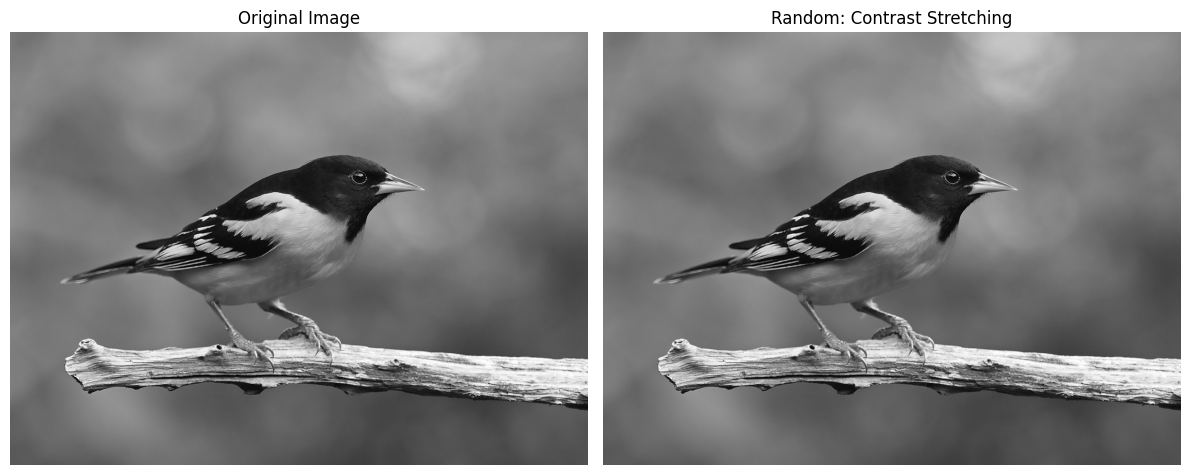


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Contrast Stretching


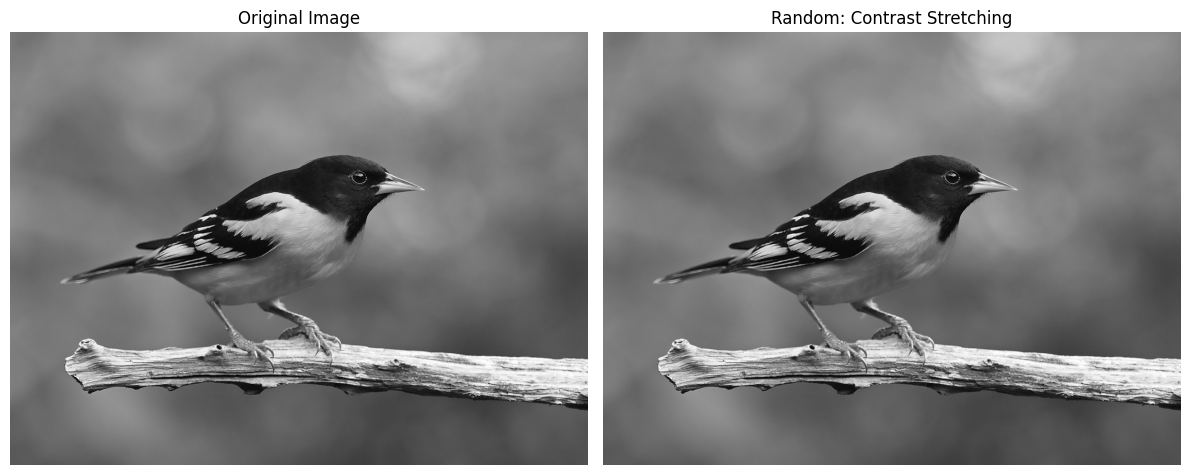


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Log Transformation


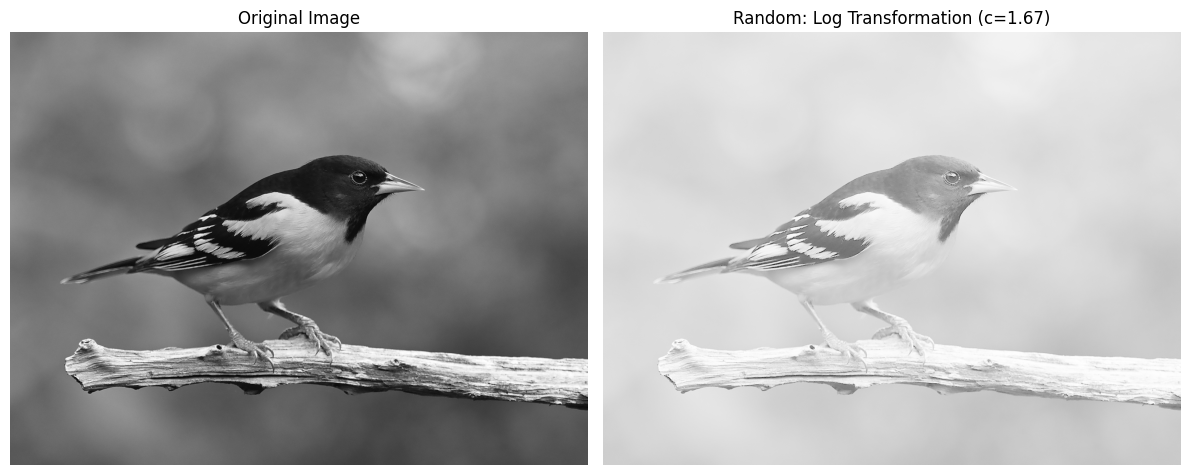


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Gamma Correction


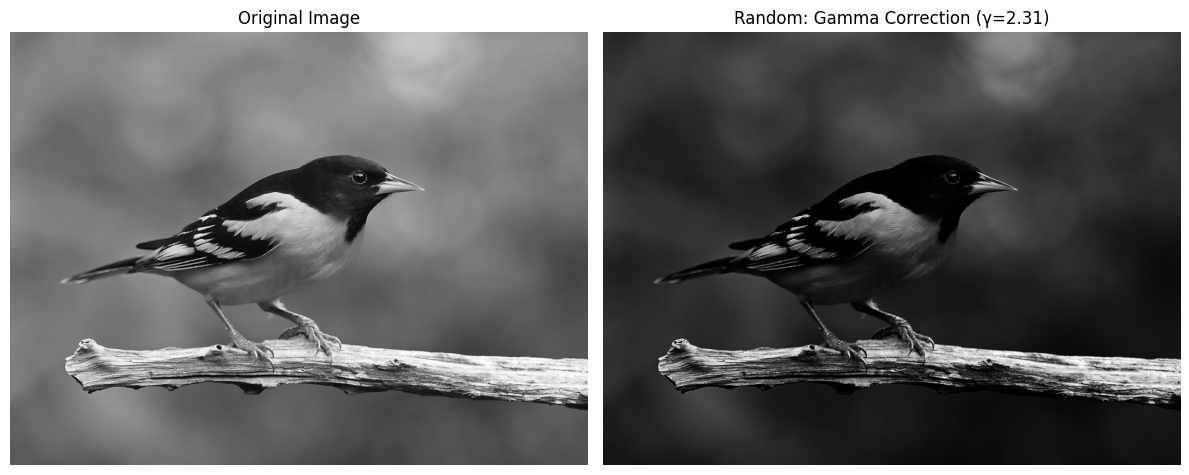


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit
Ket thuc chuong trinh!


In [ ]:
#bai tap 3
import random

def random_transformation():
    """Randomly pick and apply an image transformation"""
    # Load image
    img = Image.open("bird.png").convert("L")
    img_array = np.asarray(img)
    
    # Define random pool
    transformations = [
        "Image Inverse",
        "Gamma Correction", 
        "Log Transformation",
        "Histogram Equalization",
        "Contrast Stretching",
    ]
    
    # Randomly select a transformation
    selected_transform = random.choice(transformations)
    print(f"\n🎲 Randomly selected: {selected_transform}")
    
    # Apply the selected transformation
    if selected_transform == "Image Inverse":
        result = 255 - img_array
        show_results(img, Image.fromarray(result), "Random: Image Inverse")
        
    elif selected_transform == "Gamma Correction":
        gamma = random.uniform(0.3, 2.5)  # Random gamma between 0.3 and 2.5
        normalized = img_array.astype(float) / 255.0
        result = np.power(normalized, gamma) * 255
        show_results(img, Image.fromarray(result.astype(np.uint8)), f"Random: Gamma Correction (γ={gamma:.2f})")
        
    elif selected_transform == "Log Transformation":
        c = random.uniform(0.5, 2.0)  # Random constant between 0.5 and 2.0
        result = c * np.log(1 + img_array.astype(float))
        result = (result / np.max(result) * 255).astype(np.uint8)
        show_results(img, Image.fromarray(result), f"Random: Log Transformation (c={c:.2f})")
        
    elif selected_transform == "Histogram Equalization":
        hist, _ = np.histogram(img_array, 256, [0, 256])
        cdf = hist.cumsum()
        cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
        result = cdf_normalized[img_array].astype(np.uint8)
        show_results(img, Image.fromarray(result), "Random: Histogram Equalization")
        
    elif selected_transform == "Contrast Stretching":
        r_min, r_max = np.min(img_array), np.max(img_array)
        result = ((img_array - r_min) * 255.0 / (r_max - r_min)).astype(np.uint8)
        show_results(img, Image.fromarray(result), "Random: Contrast Stretching")

def random_transformation_menu():
    """Menu for random transformations"""
    while True:
        print("\n=== RANDOM TRANSFORMATION PICKER ===")
        print("1. Apply Random Transformation")
        print("Q. Quit")
        
        choice = input("Chon lua chon (1/Q): ").upper()
        
        if choice == '1':
            random_transformation()
                
        elif choice == 'Q':
            print("Ket thuc chuong trinh!")
            break
        else:
            print("Lua chon khong hop le!")

# Run the random transformation picker
random_transformation_menu()
    


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Fast Fourier Transform


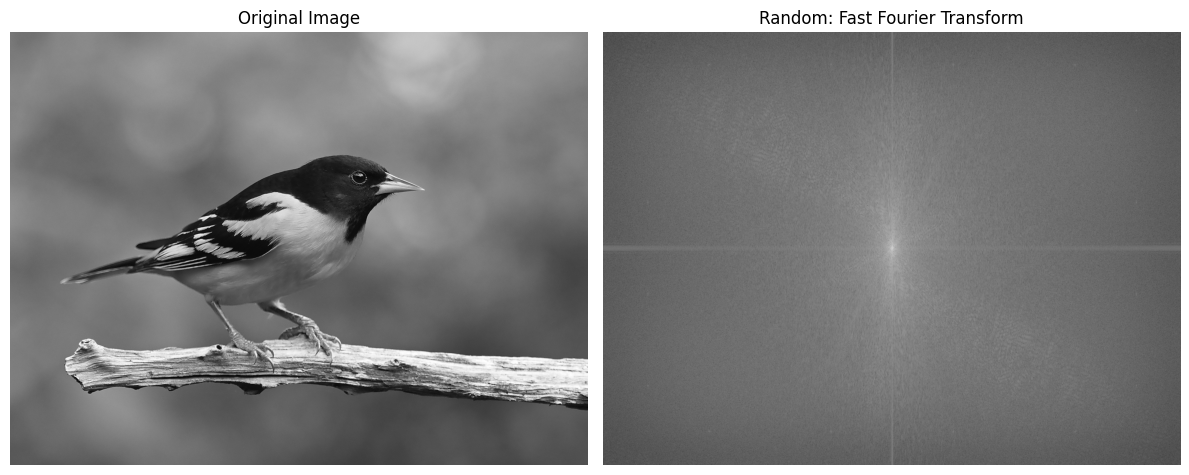


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Butterworth Lowpass Filter


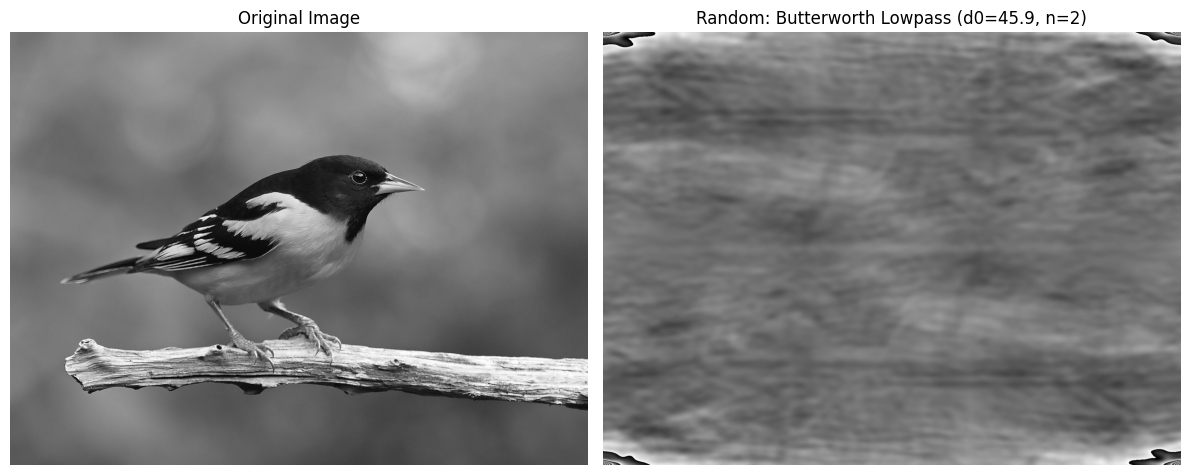


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Butterworth Lowpass Filter


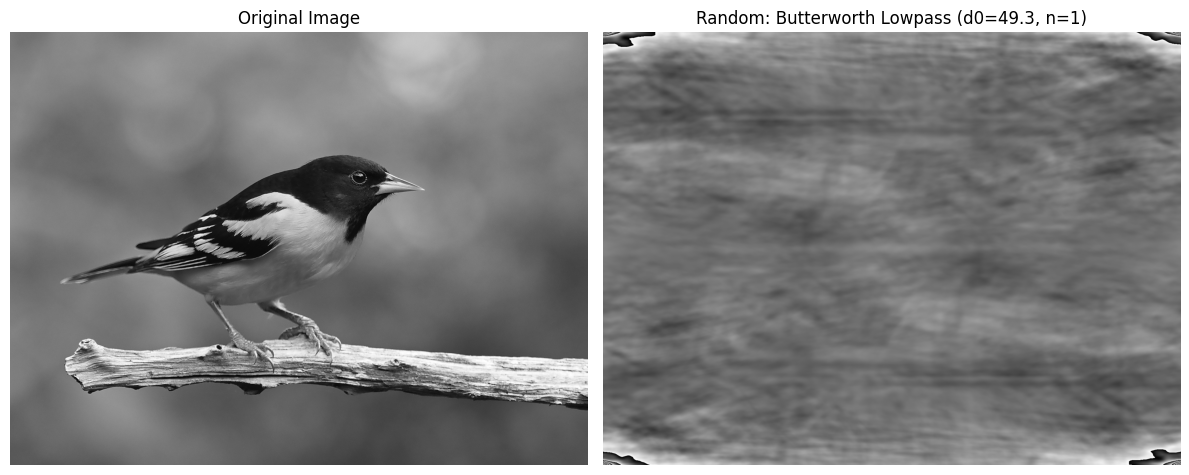


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Butterworth Lowpass Filter


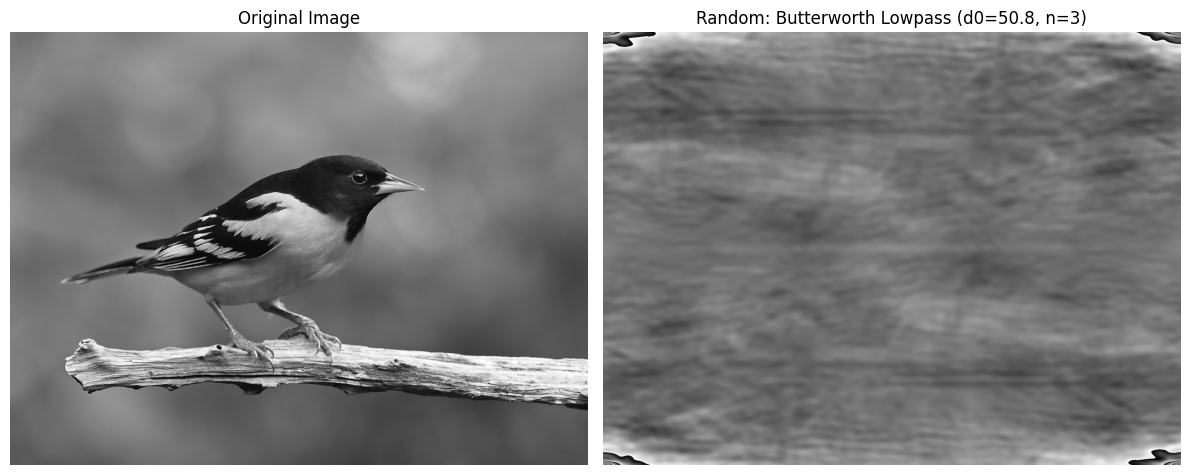


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Fast Fourier Transform


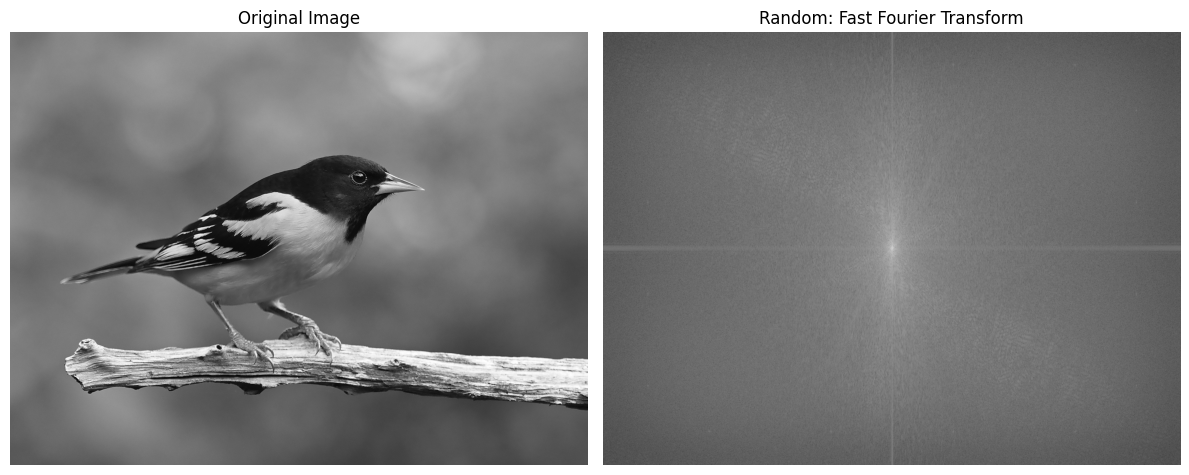


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit

🎲 Randomly selected: Butterworth Highpass Filter


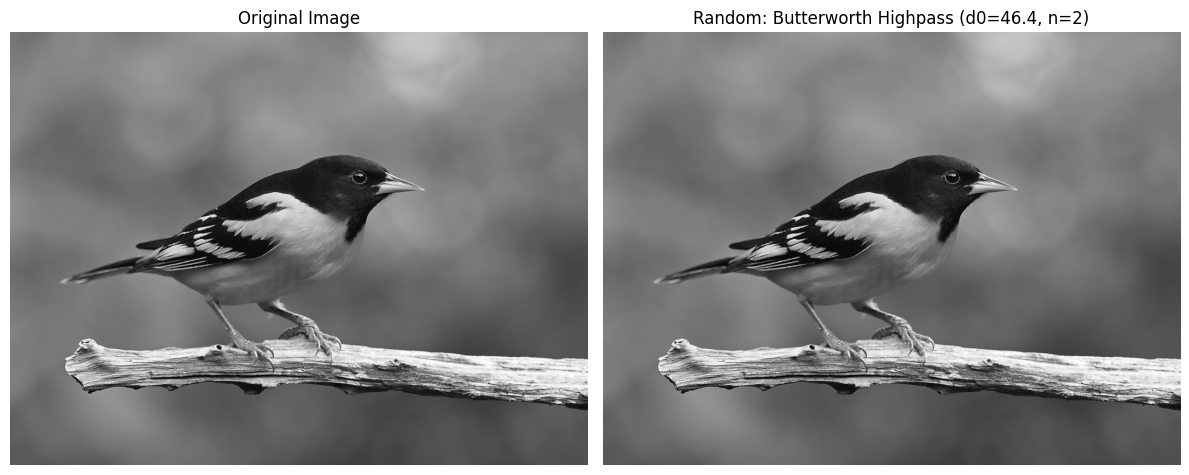


=== RANDOM TRANSFORMATION PICKER ===
1. Apply Random Transformation
Q. Quit
Ket thuc chuong trinh!


In [13]:
import random

def lowpass_filter(img_array, d0=30, n=1):
    c = abs(scipy.fftpack.fft2(img_array))
    # shifting the Fourier frequency image
    d = scipy.fftpack.fftshift(c)
    
    # initializing variables for convolution function
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and values in H are initialized to 1
    H = np.ones((M, N))

    center1 = M/2
    center2 = N/2
    d_0 = d0  # cut-off radius
    n1 = n    # the order of BLPF (Butterworth Lowpass Filter)
    
    # Complete the filter implementation
    for i in range(M):
        for j in range(N):
            u1 = (i - center1)**2 + (j - center2)**2
            # euclidean distance from origin is computed
            r = math.sqrt(u1)
            # using cut-off radius to eliminate high frequency
            if r > d_0:
                H[i, j] = 1/(1 + (r/d_0)**(2*n1))
    
    # H is converted to float
    H = H.astype(float)
    
    # performing the convolution
    con = d * H
    
    # computing the magnitude of the inverse FFT
    e = abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(con)))
    
    # Convert to uint8 for display
    result = e.astype(np.uint8)
    
    return result


def random_transformation():
    """Randomly pick and apply an image transformation"""
    # Load image
    img = Image.open("bird.png").convert("L")
    img_array = np.asarray(img)
    
    # Define available transformations
    transformations = [
        "Fast Fourier Transform",
        "Butterworth Lowpass Filter",
        "Butterworth Highpass Filter"
    ]
    
    # Randomly select a transformation
    selected_transform = random.choice(transformations)
    print(f"\n🎲 Randomly selected: {selected_transform}")
    
        
    if selected_transform == "Fast Fourier Transform":
        result = fast_fourier_transform(img_array)
        show_results(img, Image.fromarray(result), "Random: Fast Fourier Transform")
        
    elif selected_transform == "Butterworth Lowpass Filter":
        d0 = random.uniform(20, 60)  # Random cutoff radius
        n = random.randint(1, 3)     # Random order
        result = lowpass_filter(img_array, d0, n)
        show_results(img, Image.fromarray(result), f"Random: Butterworth Lowpass (d0={d0:.1f}, n={n})")
        
    elif selected_transform == "Butterworth Highpass Filter":
        d0 = random.uniform(20, 60)  # Random cutoff radius
        n = random.randint(1, 3)     # Random order
        result = butterworth_highpass_filter(img_array, d0, n)
        show_results(img, Image.fromarray(result), f"Random: Butterworth Highpass (d0={d0:.1f}, n={n})")

def random_transformation_menu():
    """Menu for random transformations"""
    while True:
        print("\n=== RANDOM TRANSFORMATION PICKER ===")
        print("1. Apply Random Transformation")
        print("Q. Quit")
        
        choice = input("Chon lua chon (1/Q): ").upper()
        
        if choice == '1':
            random_transformation()
                
        elif choice == 'Q':
            print("Ket thuc chuong trinh!")
            break
        else:
            print("Lua chon khong hop le!")

# Run the random transformation picker
random_transformation_menu()